In [1]:
%run test.ipynb
pd.options.mode.chained_assignment = None

In [3]:
names={'adickes_bettge1':[8055,8075], 
       
       'arnold1':[7994,8006], 'arnold2':[8006,8018],
       
       'bettge1':[8032,8053], 'bettge2':[8074,8086],
       'bettge3':[7987,8007],'bettge4':[8011,8022],
       'bettge5':[7989,7993],'bettge6':[8040,8047],
       
       'brandt1':[8088,8096],'brandt2':[8092,8098],'brandt3':[8111,8119],
       
       'migura1':[8026,8028],
       
       'warwas1':[7982,7992]}

In [7]:
name=list(names.keys())[3]
df=pd.read_csv(name+'.csv')
if name == 'brandt3':
    df.columns=['DEPT', 'GR', 'LL8', 'ILM', 'ILD', 'DPHI', 'NPHI']
    df['SP']=None
else:
    df.columns=['DEPT', 'GR', 'SP', 'LL8', 'ILM', 'ILD', 'DPHI', 'NPHI']
df

,DEPT,GR,SP,LL8,ILM,ILD,DPHI,NPHI
0,8015.5,94.142631,2.350650,3.154510,2.916838,2.588660,0.072825,0.335345
1,8016.0,97.029232,2.446464,3.263582,2.908013,2.539963,0.063672,0.319752
2,8016.5,96.868186,2.526293,3.388927,2.872140,2.521359,0.053395,0.304897
3,8017.0,95.653603,2.590572,3.408008,2.824861,2.524998,0.046425,0.301953
4,8017.5,95.325195,2.639741,3.312105,2.788076,2.542126,0.039567,0.308117
...,...,...,...,...,...,...,...,...
481,8256.0,96.684566,-5.710075,5.928702,5.136529,4.869659,0.070150,0.244971
482,8256.5,122.219758,-4.856605,5.960719,5.256464,4.952789,0.068554,0.245340
483,8257.0,-6.059030,-4.032156,5.995132,5.335093,5.043356,0.072811,0.243368
484,8257.5,164.241710,-3.299485,6.026005,5.357165,5.127112,0.076692,0.241650


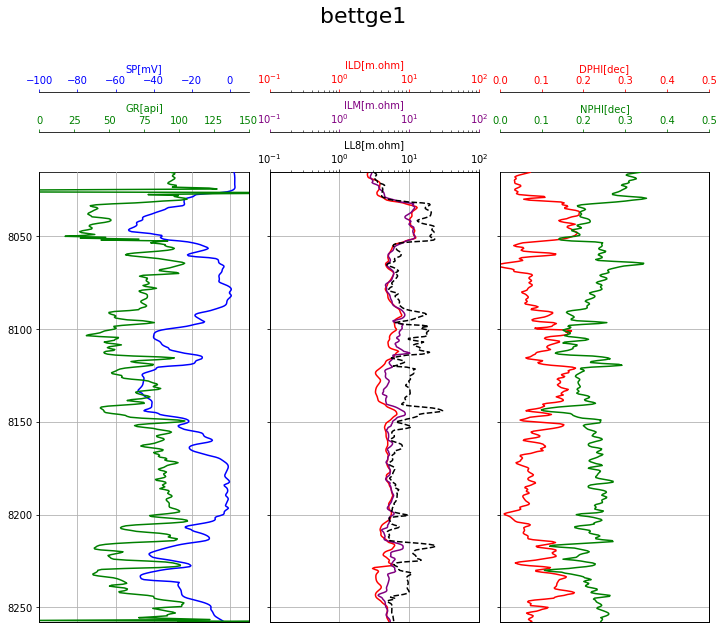

In [9]:
# for i in list(names.keys()):
#     df=pd.read_csv(i+'.csv')
    
#     if i == 'brandt3':
#         df.columns=['DEPT', 'GR', 'LL8', 'ILM', 'ILD', 'DPHI', 'NPHI']
#         df['SP']=None
#     else:
#         df.columns=['DEPT', 'GR', 'SP', 'LL8', 'ILM', 'ILD', 'DPHI', 'NPHI']
triple_combo_plot(df, df.DEPT.min(),df.DEPT.max(),name,save=False)

In [22]:
Log_dict={'Pure Shale GR': 95, 
          'Clean Sand GR': 18,
          'Pure Shale Density': 0.04,
          'Pure Shale Neutron': 0.32,
          'Pure Shale Resistivity':3,
          'Rw':.0474,
          'm':1,
          'n':2,
          'a':2}

In [23]:
Csh=vclgr(df.GR, Log_dict['Clean Sand GR'], Log_dict['Pure Shale GR'])
df['Csh']=Csh

In [27]:
payzone_top=names[name][0]
payzone_bottom=names[name][1]
df_payzone=df[(df.DEPT >= payzone_top) & (df.DEPT <=payzone_bottom)]
df_payzone

,DEPT,GR,SP,LL8,ILM,ILD,DPHI,NPHI,Csh
33,8032.0,68.459781,-23.880787,15.549232,9.929209,8.169763,0.153824,0.248454,0.655322
34,8032.5,52.167924,-23.740123,19.510289,11.657515,8.946747,0.148713,0.218725,0.443739
35,8033.0,40.619325,-23.849922,19.974259,11.201812,9.949110,0.149802,0.195033,0.293757
36,8033.5,36.387243,-24.718327,19.085325,11.278271,11.447144,0.161112,0.185393,0.238795
37,8034.0,37.870440,-28.487984,17.897438,11.875592,12.645280,0.162159,0.187006,0.258058
38,8034.5,41.172251,-32.218990,17.054879,12.048514,13.031999,0.155095,0.194408,0.300938
39,8035.0,41.881803,-33.208477,17.042881,11.854881,12.801546,0.155418,0.202138,0.310153
40,8035.5,40.586927,-33.998771,17.828646,11.522674,12.270782,0.166921,0.204796,0.293337
41,8036.0,39.061663,-35.375337,19.039879,11.247957,11.733629,0.180661,0.200951,0.273528
42,8036.5,37.887709,-36.949439,20.227346,11.025088,11.306936,0.188780,0.195071,0.258282


In [28]:
df_payzone['phiss']=Phi_ss(df_payzone['DPHI'],
                           df_payzone['NPHI'],
                           df_payzone['Csh'],
                          )

In [29]:
df_payzone['Rss']=Rss(df.ILD, df.Csh)

In [30]:
df_payzone['Sw']=Sw(df_payzone.Rss,
                    df_payzone.phiss)